# TITLE

Thinking about why leave points cut off so quickly
reporting time it took to do the task, velocity
checker for outliers-- one point super far from point before and point after

data to eliminate: 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 27 (obstacle)

control: 4, 5, 15, 16, 17, 19, 20, check: 25, 26

confed f: 21, 23, 24  confed m:

box:

In [536]:
%matplotlib inline

import os
import matplotlib.pyplot as plt


# Import local code
import sys
sys.path.append(os.getcwd().replace('notebooks', 'module'))

from utils import *

In [537]:
# #because above isn't working--DELETE LATER
# import math

# import pandas as pd
# def load_posyx_file(f_name):
#     """Helper function to load data."""

#     # Update this list to specify which columns you want to keep
#     keep_cols = ['tagId', 'timestamp', 'success', 'x', 'y', 'z', 'latency']

#     # Load the data
#     df = pd.read_json(f_name, lines=True, orient='records')

#     # Grab the data column, unpack and add all the embedded jsons
#     data_df = pd.read_json(df.pop('data').to_json(), orient='index')
#     for col in ['coordinates', 'metrics', 'orientation']:
#         temp = pd.read_json(data_df[col].to_json(), orient='index')
#         df = pd.concat([df, temp], axis=1, join_axes=[df.index])

#     # Select columns to return
#     df = df[keep_cols]

#     return df

## Settings

In [538]:
subj_ind = 19

## Loading data

In [539]:
# Create the path to the data (assume the Github repo, but works on any computer)
dat_path = os.getcwd().replace('notebooks', 'data')
# Note: this also works, but looks like nonsense. 
#dat_path = '/'.join(os.getcwd().split('/')[0:-1]) + '/data/'

In [540]:
# Check all data files
all_files = os.listdir(dat_path)
subj_files = [file for file in all_files if 'subj' in file]
print(subj_files)

# Create full subj data path
subj_dat_path = os.path.join(dat_path, subj_files[subj_ind])

['subj_01.json', 'subj_02.json', 'subj_03.json', 'subj_04.json', 'subj_05.json', 'subj_06.json', 'subj_08.json', 'subj_09.json', 'subj_10.json', 'subj_11.json', 'subj_12.json', 'subj_13.json', 'subj_14.json', 'subj_15.json', 'subj_16.json', 'subj_17.json', 'subj_18.json', 'subj_19.json', 'subj_20.json', 'subj_21.json', 'subj_22.json', 'subj_23.json', 'subj_24.json']


In [541]:
# Load the data
df = load_posyx_file(subj_dat_path)
print(subj_dat_path)

C:\Users\CCL\Documents\GitHub\Pozyx\data\subj_21.json


In [542]:
df.head()

,tagId,timestamp,x,y,z,latency
0,26395,2019-05-30 01:20:26.117000103,NaN,NaN,NaN,NaN
1,26382,2019-05-30 01:20:26.440999985,NaN,NaN,NaN,NaN
2,26383,2019-05-30 01:20:26.812999964,3666.0,5401.0,0.0,81.8
3,26457,2019-05-30 01:20:26.904000044,7880.0,8065.0,0.0,156.7
4,26395,2019-05-30 01:20:27.085000038,NaN,NaN,NaN,NaN


There are 4 tags
The tag IDs are: 26457


participant
    tagId                     timestamp       x       y    z  latency
1   26382 2019-05-30 01:20:26.440999985     NaN     NaN  NaN      NaN
5   26382 2019-05-30 01:20:27.407999992  3129.0  6802.0  0.0     94.3
9   26382 2019-05-30 01:20:28.171000004  4414.0  6706.0  0.0     79.7
13  26382 2019-05-30 01:20:28.869999886  5262.0  6465.0  0.0     82.4
17  26382 2019-05-30 01:20:29.661000013  6690.0  6082.0  0.0     78.9


local
    tagId                     timestamp       x       y    z  latency
3   26457 2019-05-30 01:20:26.904000044  7880.0  8065.0  0.0    156.7
7   26457 2019-05-30 01:20:27.634999990  7824.0  8098.0  0.0    144.5
11  26457 2019-05-30 01:20:28.348000050  7736.0  8074.0  0.0    138.6
15  26457 2019-05-30 01:20:29.071000099  7878.0  8134.0  0.0    147.9
19  26457 2019-05-30 01:20:29.835999966  7672.0  8089.0  0.0    231.9




In [562]:
#Create dataframes my own way for easier access right now
dfParticipant = df[df['tagId']== 26382]
dfLocal = df[df['tagId']== 26475]
dfConfed = df[df['tagId'] == 26395]

In [564]:
dfParticipant = dfParticipant.dropna()
#dfParticipant
dfConfed
dfConfed.dropna()

,tagId,timestamp,x,y,z,latency
32,26395,2019-05-30 01:20:32.926000118,5100.0,5776.0,0.0,78.8
36,26395,2019-05-30 01:20:33.690000057,5110.0,5718.0,0.0,80.2
40,26395,2019-05-30 01:20:34.369999886,5005.0,5802.0,0.0,77.0
48,26395,2019-05-30 01:20:36.023000002,4947.0,5859.0,0.0,79.6
52,26395,2019-05-30 01:20:36.799999952,4995.0,5818.0,0.0,78.8
60,26395,2019-05-30 01:20:38.448999882,5265.0,5687.0,0.0,77.2
68,26395,2019-05-30 01:20:40.138999939,5094.0,5820.0,0.0,75.8
72,26395,2019-05-30 01:20:40.851999998,5071.0,5806.0,0.0,93.7
80,26395,2019-05-30 01:20:42.526999950,5105.0,5930.0,0.0,95.4
88,26395,2019-05-30 01:20:44.299999952,5012.0,5974.0,0.0,79.0


,tagId,timestamp,x,y,z,latency
2,26383,2019-05-30 01:20:26.812999964,3666.0,5401.0,0.0,81.8
6,26383,2019-05-30 01:20:27.509000063,3696.0,5479.0,0.0,83.8
10,26383,2019-05-30 01:20:28.259000063,3588.0,5354.0,0.0,77.7
14,26383,2019-05-30 01:20:28.961999893,3683.0,5396.0,0.0,96.4
18,26383,2019-05-30 01:20:29.746999979,3618.0,5414.0,0.0,81.1
22,26383,2019-05-30 01:20:30.519999981,3581.0,5284.0,0.0,89.2
26,26383,2019-05-30 01:20:31.614000082,3738.0,5505.0,0.0,80.7
30,26383,2019-05-30 01:20:32.696000099,3663.0,5473.0,0.0,76.8
34,26383,2019-05-30 01:20:33.349999905,3659.0,5367.0,0.0,78.3
38,26383,2019-05-30 01:20:34.141000032,3686.0,5500.0,0.0,76.0


In [548]:
#Create a function to make dataframes for the participant's leaving and returning from the hallway

def createExperimentDfs(participant_df):
    leave_df = pd.DataFrame(columns=['tagId', 'timestamp', 'success', 'x', 'y', 'z', 'latency'])
    return_df = pd.DataFrame(columns=['tagId', 'timestamp', 'success', 'x', 'y', 'z', 'latency'])
    index1 = participant_df.index[0]
    index2 = 0
    marker = 0
    df_to_append = 0
    for index, row in participant_df.iterrows():
        index2 = participant_df.index[marker]
        
        if (index2 - index1 <= 2 and df_to_append == 0):
            leave_df = leave_df.append(row)
            
        elif (index2 - index1 <= 2 and df_to_append == 1):
            return_df = return_df.append(row)
            
        elif (index2 - index1 > 500):
            df_to_append = 1
        
        else:
            if (df_to_append == 0):
                leave_df = leave_df.append(row)
                #leave_df.set_value[index, 'consecutive', 'False']
            else :
                return_df = return_df.append(row)
                #return_df.set_value[index, 'consecutive', 'False']
                
        index1 = participant_df.index[marker]
        marker = marker + 1
    return leave_df, return_df

In [549]:
participant_leave, participant_return = createExperimentDfs(dfParticipant)

In [550]:
#participant_leave

In [567]:
participant_return

,tagId,timestamp,success,x,y,z,latency
613,26382,2019-05-30 01:22:28.063999891,NaN,0.0,0.0,0.0,80.8
617,26382,2019-05-30 01:22:28.509000063,NaN,21729.0,-11573.0,0.0,83.8
633,26382,2019-05-30 01:22:31.862999916,NaN,16977.0,-10178.0,0.0,82.4
641,26382,2019-05-30 01:22:33.081000090,NaN,15294.0,-9417.0,0.0,92.6
649,26382,2019-05-30 01:22:34.321000099,NaN,14046.0,-8337.0,0.0,79.8
653,26382,2019-05-30 01:22:34.779000044,NaN,13294.0,-7981.0,0.0,79.8
657,26382,2019-05-30 01:22:35.240999937,NaN,12817.0,-7451.0,0.0,78.6
661,26382,2019-05-30 01:22:35.767999887,NaN,12301.0,-6961.0,0.0,96.9
665,26382,2019-05-30 01:22:36.239000082,NaN,11824.0,-6390.0,0.0,81.8
677,26382,2019-05-30 01:22:38.012000084,NaN,10296.0,-4189.0,0.0,82.1


In [552]:
def findOutliers(parDf):
 
    index1 = parDf.index[0]
    index2 = 0
    marker = 0
    
    df_to_append = 0
    for index, row in parDf.iterrows():
        index2 = parDf.index[marker]
        if (marker >= 1):
            xDiff = abs(parDf.iloc[marker]['x'] - parDf.iloc[marker - 1]['x'])
            yDiff = abs(parDf.iloc[marker]['y'] - parDf.iloc[marker - 1]['y'])
            if (xDiff + yDiff > 7000):
                print('Possible outlier at ' + str(index - 1))
       
                
        index1 = parDf.index[marker]
        marker = marker + 1

In [553]:
findOutliers(participant_return)

#participant_return.iloc[0]['x']

Possible outlier at 617


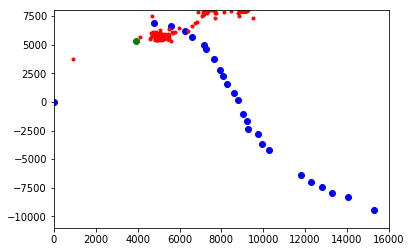

In [566]:
plt.figure()
plt.plot(participant_return.x, participant_return.y, '.', color='blue', ms=12)
plt.plot(dfConfed.x, dfConfed.y, '.', color='red')
plt.plot(5126, 5592, 'r.', ms = 12)
plt.plot(3942, 5350, 'g.', ms = 12)
plt.xlim([0,16000])
plt.ylim([-11000,8000]);
#plt.savefig('FileName.png')